# importing library

In [1]:

import numpy as np
import glob as gb
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import preprocessing
from sklearn import  metrics
from sklearn import svm
import random
import os
import cv2
import glob
import seaborn as sb
from sklearn.metrics import confusion_matrix
%matplotlib inline


# spliting folders

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [125]:
import splitfolders
splitfolders.ratio('E:\mydataset\IMAG\Dataset', output="E:\mydataset\IMAG", seed=1337, ratio=(.7, 0.3))

Copying files: 11007 files [00:40, 271.01 files/s]


# loading my data

In [2]:
p="E:\\mydataset\\IMAG\\train\\"
class_names = sorted(os.listdir(p))
n_classes = len(class_names)

# Class Distribution
class_dis = [len(os.listdir(p + name)) for name in class_names]


# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 36 
Class Names : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Exploring my dataset

In [3]:
z = sorted(os.listdir('E:\\mydataset\\IMAG\\train\\'))
for n in z:
    count = len(os.listdir(f'E:\\mydataset\\IMAG\\train\\{n}'))
    print(f'{n} images={count}')

0 images=98
1 images=149
2 images=127
3 images=112
4 images=149
5 images=149
6 images=149
7 images=149
8 images=149
9 images=149
A images=299
B images=299
C images=249
D images=238
E images=219
F images=251
G images=254
H images=271
I images=272
J images=271
K images=208
L images=214
M images=280
N images=222
O images=192
P images=299
Q images=299
R images=299
S images=228
T images=109
U images=230
V images=244
W images=227
X images=194
Y images=210
Z images=227


In [4]:
z = sorted(os.listdir('E:\\mydataset\\IMAG\\val\\'))
for n in z:
    count = len(os.listdir(f'E:\\mydataset\\IMAG\\val\\{n}'))
    print(f'{n} images={count}')

0 images=43
1 images=65
2 images=55
3 images=48
4 images=65
5 images=65
6 images=65
7 images=65
8 images=65
9 images=65
A images=129
B images=129
C images=107
D images=103
E images=95
F images=109
G images=109
H images=117
I images=117
J images=117
K images=90
L images=92
M images=121
N images=96
O images=83
P images=129
Q images=129
R images=129
S images=98
T images=47
U images=99
V images=106
W images=98
X images=84
Y images=90
Z images=98


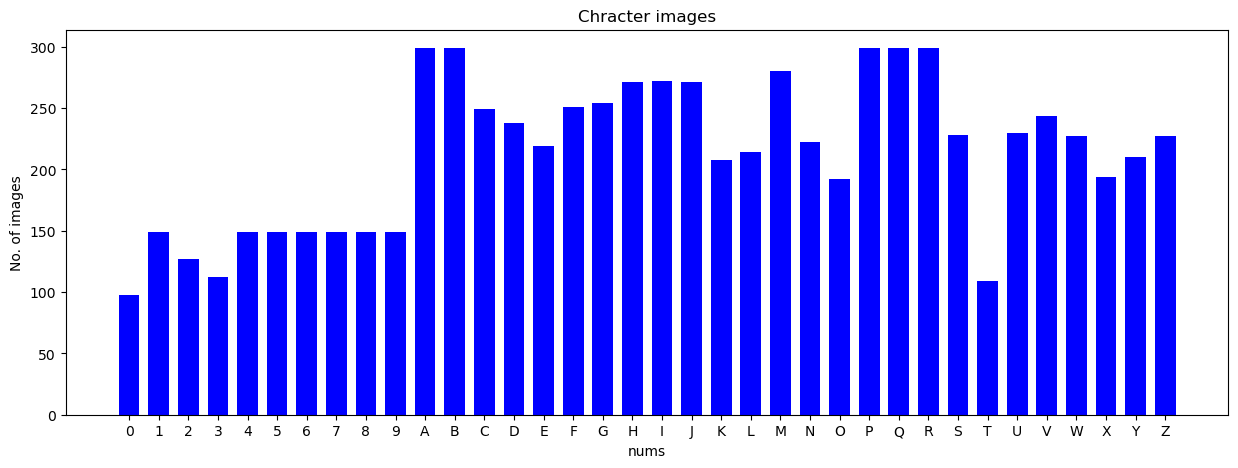

In [5]:
num = sorted(os.listdir('E:\\mydataset\\IMAG\\train\\'))
values = [len(os.listdir(f'E:\\mydataset\\IMAG\\train\\{n}')) for n in num]
fig = plt.figure(figsize = (15, 5))
plt.bar(num, values, color ='blue',
        width = 0.7)

plt.xlabel("nums")
plt.ylabel("No. of images")
plt.title("Chracter images")
plt.show()

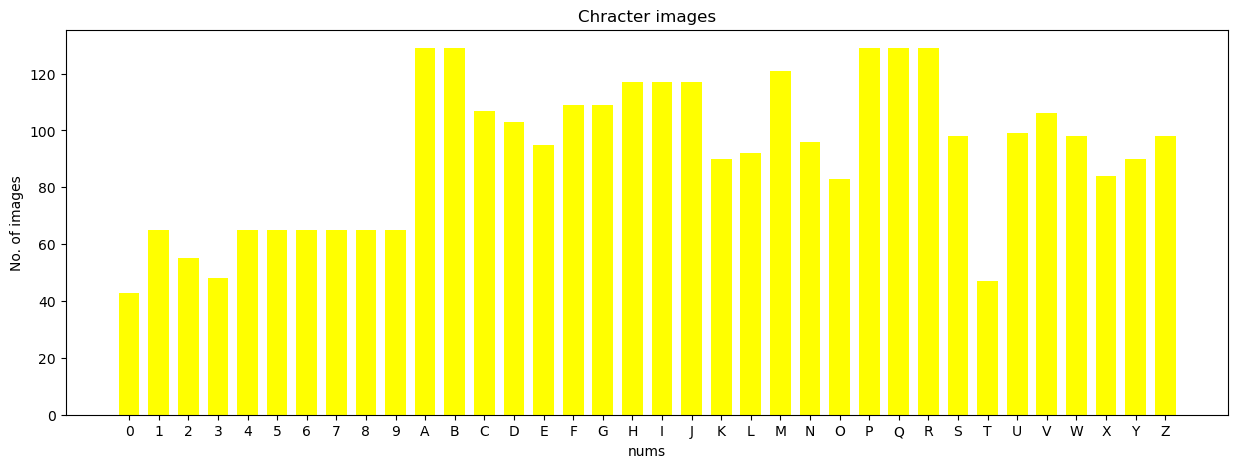

In [6]:
num = sorted(os.listdir('E:\\mydataset\\IMAG\\val\\'))
values = [len(os.listdir(f'E:\\mydataset\\IMAG\\val\\{n}')) for n in num]
fig = plt.figure(figsize = (15, 5))
plt.bar(num, values, color ='yellow',
        width = 0.7)

plt.xlabel("nums")
plt.ylabel("No. of images")
plt.title("Chracter images")
plt.show()

In [74]:

fig = px.pie(names=class_names, values=class_dis, title="Training Class Distribution")
fig.update_layout({'title':{'x':0.48}})

fig.show()

# Showing sizes of images 

In [8]:

si = []
for folder in  os.listdir('E:\\mydataset\\IMAG\\train\\') : 
    files = gb.glob(pathname= str( 'E:\\mydataset\\IMAG\\train\\' + folder + '/*.png'))
    print(folder)
    for file in files: 
        image = plt.imread(file)
        si.append(image.shape)
pd.Series(si).value_counts()

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


(128, 128)        6903
(900, 1200, 3)     285
(60, 42, 3)          3
(61, 34, 3)          3
(22, 26, 3)          2
                  ... 
(213, 149, 3)        1
(147, 91, 3)         1
(191, 72, 3)         1
(362, 154, 3)        1
(156, 141, 3)        1
Length: 476, dtype: int64

# Will resize images in 128*128

In [9]:
size=128
d=sorted(os.listdir('E:\\mydataset\\IMAG\\train\\'))
l='E:\\mydataset\\IMAG\\train\\'
l+d[0]


'E:\\mydataset\\IMAG\\train\\0'

In [10]:
from IPython.lib.display import join
xt_img=[]
yt_img=[]
for ds in d:
  m=ds.split("\\")[-1]
  print(m)


  for img in glob.glob(os.path.join(l+ds,"*.png")):
    print(img)
    im=cv2.imread(img,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(size,size))
    xt_img.append(im)
    yt_img.append(sorted(m))

0
E:\mydataset\IMAG\train\0\img001-00088.png
E:\mydataset\IMAG\train\0\img001-00089.png
E:\mydataset\IMAG\train\0\img001-00091.png
E:\mydataset\IMAG\train\0\img001-00092.png
E:\mydataset\IMAG\train\0\img001-00093.png
E:\mydataset\IMAG\train\0\img001-00104.png
E:\mydataset\IMAG\train\0\img001-00105.png
E:\mydataset\IMAG\train\0\img001-00179.png
E:\mydataset\IMAG\train\0\img001-00180.png
E:\mydataset\IMAG\train\0\img001-00192.png
E:\mydataset\IMAG\train\0\img001-00407.png
E:\mydataset\IMAG\train\0\img001-00408.png
E:\mydataset\IMAG\train\0\img001-00409.png
E:\mydataset\IMAG\train\0\img001-00410.png
E:\mydataset\IMAG\train\0\img001-00413.png
E:\mydataset\IMAG\train\0\img001-00414.png
E:\mydataset\IMAG\train\0\img001-00415.png
E:\mydataset\IMAG\train\0\img001-00416.png
E:\mydataset\IMAG\train\0\img001-00418.png
E:\mydataset\IMAG\train\0\img001-00419.png
E:\mydataset\IMAG\train\0\img001-00420.png
E:\mydataset\IMAG\train\0\img001-00422.png
E:\mydataset\IMAG\train\0\img001-00617.png
E:\mydata

E:\mydataset\IMAG\train\5\img006-00651.png
E:\mydataset\IMAG\train\5\img006-00668.png
E:\mydataset\IMAG\train\5\img006-00670.png
E:\mydataset\IMAG\train\5\img006-00671.png
E:\mydataset\IMAG\train\5\img006-00672.png
E:\mydataset\IMAG\train\5\img006-00694.png
E:\mydataset\IMAG\train\5\img006-00702.png
E:\mydataset\IMAG\train\5\img006-00703.png
E:\mydataset\IMAG\train\5\img006-00704.png
E:\mydataset\IMAG\train\5\img006-00723.png
E:\mydataset\IMAG\train\5\img006-00725.png
E:\mydataset\IMAG\train\5\img006-00726.png
E:\mydataset\IMAG\train\5\img006-00755.png
E:\mydataset\IMAG\train\5\img006-00758.png
E:\mydataset\IMAG\train\5\img006-00759.png
E:\mydataset\IMAG\train\5\img006-00761.png
E:\mydataset\IMAG\train\5\img006-00762.png
E:\mydataset\IMAG\train\5\img006-00778.png
E:\mydataset\IMAG\train\5\img006-00793.png
E:\mydataset\IMAG\train\5\img006-00810.png
E:\mydataset\IMAG\train\5\img006-00811.png
E:\mydataset\IMAG\train\5\img006-00824.png
E:\mydataset\IMAG\train\5\img006-00840.png
E:\mydatase

E:\mydataset\IMAG\train\7\img008-030.png
E:\mydataset\IMAG\train\7\img008-031.png
E:\mydataset\IMAG\train\7\img008-032.png
E:\mydataset\IMAG\train\7\img008-033.png
E:\mydataset\IMAG\train\7\img008-034.png
E:\mydataset\IMAG\train\7\img008-035.png
E:\mydataset\IMAG\train\7\img008-037.png
E:\mydataset\IMAG\train\7\img008-038.png
E:\mydataset\IMAG\train\7\img008-039.png
E:\mydataset\IMAG\train\7\img008-041.png
E:\mydataset\IMAG\train\7\img008-042.png
E:\mydataset\IMAG\train\7\img008-043.png
E:\mydataset\IMAG\train\7\img008-045.png
E:\mydataset\IMAG\train\7\img008-046.png
E:\mydataset\IMAG\train\7\img008-048.png
E:\mydataset\IMAG\train\7\img008-049.png
E:\mydataset\IMAG\train\7\img008-050.png
E:\mydataset\IMAG\train\7\img008-051.png
E:\mydataset\IMAG\train\7\img008-053.png
E:\mydataset\IMAG\train\7\img008-054.png
8
E:\mydataset\IMAG\train\8\img009-00016.png
E:\mydataset\IMAG\train\8\img009-00017.png
E:\mydataset\IMAG\train\8\img009-00031.png
E:\mydataset\IMAG\train\8\img009-00032.png
E:\myd

E:\mydataset\IMAG\train\B\img012-00553.png
E:\mydataset\IMAG\train\B\img012-00555.png
E:\mydataset\IMAG\train\B\img012-00556.png
E:\mydataset\IMAG\train\B\img012-00557.png
E:\mydataset\IMAG\train\B\img012-00567.png
E:\mydataset\IMAG\train\B\img012-00588.png
E:\mydataset\IMAG\train\B\img012-00589.png
E:\mydataset\IMAG\train\B\img012-00590.png
E:\mydataset\IMAG\train\B\img012-00601.png
E:\mydataset\IMAG\train\B\img012-00602.png
E:\mydataset\IMAG\train\B\img012-00620.png
E:\mydataset\IMAG\train\B\img012-00621.png
E:\mydataset\IMAG\train\B\img012-00622.png
E:\mydataset\IMAG\train\B\img012-00623.png
E:\mydataset\IMAG\train\B\img012-00624.png
E:\mydataset\IMAG\train\B\img012-00625.png
E:\mydataset\IMAG\train\B\img012-00636.png
E:\mydataset\IMAG\train\B\img012-00657.png
E:\mydataset\IMAG\train\B\img012-00659.png
E:\mydataset\IMAG\train\B\img012-00670.png
E:\mydataset\IMAG\train\B\img012-00671.png
E:\mydataset\IMAG\train\B\img012-00691.png
E:\mydataset\IMAG\train\B\img012-00692.png
E:\mydatase

E:\mydataset\IMAG\train\C\img039-00435.png
E:\mydataset\IMAG\train\C\img039-00465.png
E:\mydataset\IMAG\train\C\img039-00468.png
E:\mydataset\IMAG\train\C\img039-00469.png
E:\mydataset\IMAG\train\C\img039-00470.png
E:\mydataset\IMAG\train\C\img039-00499.png
E:\mydataset\IMAG\train\C\img039-00500.png
E:\mydataset\IMAG\train\C\img039-00501.png
E:\mydataset\IMAG\train\C\img039-00502.png
E:\mydataset\IMAG\train\C\img039-00503.png
E:\mydataset\IMAG\train\C\img039-00532.png
E:\mydataset\IMAG\train\C\img039-00556.png
E:\mydataset\IMAG\train\C\img039-00557.png
E:\mydataset\IMAG\train\C\img039-00566.png
E:\mydataset\IMAG\train\C\img039-00567.png
E:\mydataset\IMAG\train\C\img039-00568.png
E:\mydataset\IMAG\train\C\img039-00569.png
E:\mydataset\IMAG\train\C\img039-00589.png
E:\mydataset\IMAG\train\C\img039-00590.png
E:\mydataset\IMAG\train\C\img039-00591.png
E:\mydataset\IMAG\train\C\img039-00600.png
E:\mydataset\IMAG\train\C\img039-00601.png
E:\mydataset\IMAG\train\C\img039-00602.png
E:\mydatase

E:\mydataset\IMAG\train\E\img041-00976.png
E:\mydataset\IMAG\train\E\img041-00978.png
E:\mydataset\IMAG\train\E\img041-00981.png
E:\mydataset\IMAG\train\E\img041-00982.png
E:\mydataset\IMAG\train\E\img041-00983.png
E:\mydataset\IMAG\train\E\img041-00984.png
E:\mydataset\IMAG\train\E\img041-00985.png
E:\mydataset\IMAG\train\E\img041-00987.png
E:\mydataset\IMAG\train\E\img041-00989.png
E:\mydataset\IMAG\train\E\img041-00990.png
E:\mydataset\IMAG\train\E\img041-00991.png
E:\mydataset\IMAG\train\E\img041-00993.png
E:\mydataset\IMAG\train\E\img041-00994.png
E:\mydataset\IMAG\train\E\img041-00995.png
E:\mydataset\IMAG\train\E\img041-00996.png
E:\mydataset\IMAG\train\E\img041-00997.png
E:\mydataset\IMAG\train\E\img041-00999.png
E:\mydataset\IMAG\train\E\img041-01002.png
E:\mydataset\IMAG\train\E\img041-01003.png
E:\mydataset\IMAG\train\E\img041-01006.png
E:\mydataset\IMAG\train\E\img041-01007.png
E:\mydataset\IMAG\train\E\img041-01009.png
E:\mydataset\IMAG\train\E\img041-01010.png
E:\mydatase

E:\mydataset\IMAG\train\G\img017-026.png
E:\mydataset\IMAG\train\G\img017-030.png
E:\mydataset\IMAG\train\G\img017-031.png
E:\mydataset\IMAG\train\G\img017-042.png
E:\mydataset\IMAG\train\G\img017-047.png
E:\mydataset\IMAG\train\G\img043-00015.png
E:\mydataset\IMAG\train\G\img043-00016.png
E:\mydataset\IMAG\train\G\img043-00031.png
E:\mydataset\IMAG\train\G\img043-00032.png
E:\mydataset\IMAG\train\G\img043-00043.png
E:\mydataset\IMAG\train\G\img043-00047.png
E:\mydataset\IMAG\train\G\img043-00060.png
E:\mydataset\IMAG\train\G\img043-00061.png
E:\mydataset\IMAG\train\G\img043-00063.png
E:\mydataset\IMAG\train\G\img043-00094.png
E:\mydataset\IMAG\train\G\img043-00115.png
E:\mydataset\IMAG\train\G\img043-00123.png
E:\mydataset\IMAG\train\G\img043-00124.png
E:\mydataset\IMAG\train\G\img043-00125.png
E:\mydataset\IMAG\train\G\img043-00146.png
E:\mydataset\IMAG\train\G\img043-00147.png
E:\mydataset\IMAG\train\G\img043-00148.png
E:\mydataset\IMAG\train\G\img043-00177.png
E:\mydataset\IMAG\tra

E:\mydataset\IMAG\train\I\img019-00015.png
E:\mydataset\IMAG\train\I\img019-00016.png
E:\mydataset\IMAG\train\I\img019-00026.png
E:\mydataset\IMAG\train\I\img019-00030.png
E:\mydataset\IMAG\train\I\img019-00031.png
E:\mydataset\IMAG\train\I\img019-00042.png
E:\mydataset\IMAG\train\I\img019-00058.png
E:\mydataset\IMAG\train\I\img019-00059.png
E:\mydataset\IMAG\train\I\img019-00061.png
E:\mydataset\IMAG\train\I\img019-00062.png
E:\mydataset\IMAG\train\I\img019-00063.png
E:\mydataset\IMAG\train\I\img019-00089.png
E:\mydataset\IMAG\train\I\img019-00090.png
E:\mydataset\IMAG\train\I\img019-00091.png
E:\mydataset\IMAG\train\I\img019-00092.png
E:\mydataset\IMAG\train\I\img019-00093.png
E:\mydataset\IMAG\train\I\img019-00115.png
E:\mydataset\IMAG\train\I\img019-00124.png
E:\mydataset\IMAG\train\I\img019-00145.png
E:\mydataset\IMAG\train\I\img019-00147.png
E:\mydataset\IMAG\train\I\img019-00148.png
E:\mydataset\IMAG\train\I\img019-00176.png
E:\mydataset\IMAG\train\I\img019-00178.png
E:\mydatase

E:\mydataset\IMAG\train\J\img020-030.png
E:\mydataset\IMAG\train\J\img020-031.png
E:\mydataset\IMAG\train\J\img020-042.png
E:\mydataset\IMAG\train\J\img020-047.png
E:\mydataset\IMAG\train\J\img046-00005.png
E:\mydataset\IMAG\train\J\img046-00006.png
E:\mydataset\IMAG\train\J\img046-00007.png
E:\mydataset\IMAG\train\J\img046-00017.png
E:\mydataset\IMAG\train\J\img046-00022.png
E:\mydataset\IMAG\train\J\img046-00034.png
E:\mydataset\IMAG\train\J\img046-00049.png
E:\mydataset\IMAG\train\J\img046-00050.png
E:\mydataset\IMAG\train\J\img046-00064.png
E:\mydataset\IMAG\train\J\img046-00073.png
E:\mydataset\IMAG\train\J\img046-00076.png
E:\mydataset\IMAG\train\J\img046-00095.png
E:\mydataset\IMAG\train\J\img046-00096.png
E:\mydataset\IMAG\train\J\img046-00097.png
E:\mydataset\IMAG\train\J\img046-00098.png
E:\mydataset\IMAG\train\J\img046-00106.png
E:\mydataset\IMAG\train\J\img046-00126.png
E:\mydataset\IMAG\train\J\img046-00128.png
E:\mydataset\IMAG\train\J\img046-00129.png
E:\mydataset\IMAG\t

E:\mydataset\IMAG\train\K\img047-017.png
E:\mydataset\IMAG\train\K\img047-022.png
E:\mydataset\IMAG\train\K\img047-033.png
E:\mydataset\IMAG\train\K\img047-034.png
E:\mydataset\IMAG\train\K\img047-048.png
E:\mydataset\IMAG\train\K\img047-049.png
L
E:\mydataset\IMAG\train\L\img022-00015.png
E:\mydataset\IMAG\train\L\img022-00016.png
E:\mydataset\IMAG\train\L\img022-00031.png
E:\mydataset\IMAG\train\L\img022-00032.png
E:\mydataset\IMAG\train\L\img022-00040.png
E:\mydataset\IMAG\train\L\img022-00043.png
E:\mydataset\IMAG\train\L\img022-00060.png
E:\mydataset\IMAG\train\L\img022-00063.png
E:\mydataset\IMAG\train\L\img022-00091.png
E:\mydataset\IMAG\train\L\img022-00093.png
E:\mydataset\IMAG\train\L\img022-00094.png
E:\mydataset\IMAG\train\L\img022-00123.png
E:\mydataset\IMAG\train\L\img022-00125.png
E:\mydataset\IMAG\train\L\img022-00146.png
E:\mydataset\IMAG\train\L\img022-00147.png
E:\mydataset\IMAG\train\L\img022-00148.png
E:\mydataset\IMAG\train\L\img022-00178.png
E:\mydataset\IMAG\tra

E:\mydataset\IMAG\train\M\img049-00289.png
E:\mydataset\IMAG\train\M\img049-00303.png
E:\mydataset\IMAG\train\M\img049-00305.png
E:\mydataset\IMAG\train\M\img049-00306.png
E:\mydataset\IMAG\train\M\img049-00320.png
E:\mydataset\IMAG\train\M\img049-00321.png
E:\mydataset\IMAG\train\M\img049-00322.png
E:\mydataset\IMAG\train\M\img049-00323.png
E:\mydataset\IMAG\train\M\img049-00337.png
E:\mydataset\IMAG\train\M\img049-00338.png
E:\mydataset\IMAG\train\M\img049-00340.png
E:\mydataset\IMAG\train\M\img049-00356.png
E:\mydataset\IMAG\train\M\img049-00357.png
E:\mydataset\IMAG\train\M\img049-00372.png
E:\mydataset\IMAG\train\M\img049-00373.png
E:\mydataset\IMAG\train\M\img049-00389.png
E:\mydataset\IMAG\train\M\img049-00390.png
E:\mydataset\IMAG\train\M\img049-00406.png
E:\mydataset\IMAG\train\M\img049-00423.png
E:\mydataset\IMAG\train\M\img049-00424.png
E:\mydataset\IMAG\train\M\img049-00425.png
E:\mydataset\IMAG\train\M\img049-00439.png
E:\mydataset\IMAG\train\M\img049-00440.png
E:\mydatase

E:\mydataset\IMAG\train\O\img051-00280.png
E:\mydataset\IMAG\train\O\img051-00299.png
E:\mydataset\IMAG\train\O\img051-00300.png
E:\mydataset\IMAG\train\O\img051-00301.png
E:\mydataset\IMAG\train\O\img051-00302.png
E:\mydataset\IMAG\train\O\img051-00303.png
E:\mydataset\IMAG\train\O\img051-00311.png
E:\mydataset\IMAG\train\O\img051-00330.png
E:\mydataset\IMAG\train\O\img051-00331.png
E:\mydataset\IMAG\train\O\img051-00332.png
E:\mydataset\IMAG\train\O\img051-00333.png
E:\mydataset\IMAG\train\O\img051-00334.png
E:\mydataset\IMAG\train\O\img051-00335.png
E:\mydataset\IMAG\train\O\img051-00354.png
E:\mydataset\IMAG\train\O\img051-00362.png
E:\mydataset\IMAG\train\O\img051-00364.png
E:\mydataset\IMAG\train\O\img051-00365.png
E:\mydataset\IMAG\train\O\img051-00366.png
E:\mydataset\IMAG\train\O\img051-00385.png
E:\mydataset\IMAG\train\O\img051-00386.png
E:\mydataset\IMAG\train\O\img051-00388.png
E:\mydataset\IMAG\train\O\img051-00397.png
E:\mydataset\IMAG\train\O\img051-00416.png
E:\mydatase

E:\mydataset\IMAG\train\P\img052-049.png
Q
E:\mydataset\IMAG\train\Q\img027-00015.png
E:\mydataset\IMAG\train\Q\img027-00016.png
E:\mydataset\IMAG\train\Q\img027-00017.png
E:\mydataset\IMAG\train\Q\img027-00031.png
E:\mydataset\IMAG\train\Q\img027-00032.png
E:\mydataset\IMAG\train\Q\img027-00043.png
E:\mydataset\IMAG\train\Q\img027-00060.png
E:\mydataset\IMAG\train\Q\img027-00063.png
E:\mydataset\IMAG\train\Q\img027-00064.png
E:\mydataset\IMAG\train\Q\img027-00092.png
E:\mydataset\IMAG\train\Q\img027-00093.png
E:\mydataset\IMAG\train\Q\img027-00094.png
E:\mydataset\IMAG\train\Q\img027-00095.png
E:\mydataset\IMAG\train\Q\img027-00115.png
E:\mydataset\IMAG\train\Q\img027-00116.png
E:\mydataset\IMAG\train\Q\img027-00124.png
E:\mydataset\IMAG\train\Q\img027-00125.png
E:\mydataset\IMAG\train\Q\img027-00148.png
E:\mydataset\IMAG\train\Q\img027-00150.png
E:\mydataset\IMAG\train\Q\img027-00179.png
E:\mydataset\IMAG\train\Q\img027-00181.png
E:\mydataset\IMAG\train\Q\img027-00201.png
E:\mydatase

E:\mydataset\IMAG\train\R\img028-030.png
E:\mydataset\IMAG\train\R\img028-031.png
E:\mydataset\IMAG\train\R\img028-042.png
E:\mydataset\IMAG\train\R\img028-047.png
E:\mydataset\IMAG\train\R\img054-00006.png
E:\mydataset\IMAG\train\R\img054-00007.png
E:\mydataset\IMAG\train\R\img054-00008.png
E:\mydataset\IMAG\train\R\img054-00033.png
E:\mydataset\IMAG\train\R\img054-00049.png
E:\mydataset\IMAG\train\R\img054-00050.png
E:\mydataset\IMAG\train\R\img054-00051.png
E:\mydataset\IMAG\train\R\img054-00073.png
E:\mydataset\IMAG\train\R\img054-00074.png
E:\mydataset\IMAG\train\R\img054-00075.png
E:\mydataset\IMAG\train\R\img054-00076.png
E:\mydataset\IMAG\train\R\img054-00077.png
E:\mydataset\IMAG\train\R\img054-00097.png
E:\mydataset\IMAG\train\R\img054-00127.png
E:\mydataset\IMAG\train\R\img054-00128.png
E:\mydataset\IMAG\train\R\img054-00129.png
E:\mydataset\IMAG\train\R\img054-00130.png
E:\mydataset\IMAG\train\R\img054-00131.png
E:\mydataset\IMAG\train\R\img054-00132.png
E:\mydataset\IMAG\t

E:\mydataset\IMAG\train\T\img056-00569.png
E:\mydataset\IMAG\train\T\img056-00589.png
E:\mydataset\IMAG\train\T\img056-00590.png
E:\mydataset\IMAG\train\T\img056-00599.png
E:\mydataset\IMAG\train\T\img056-006.png
E:\mydataset\IMAG\train\T\img056-00600.png
E:\mydataset\IMAG\train\T\img056-00624.png
E:\mydataset\IMAG\train\T\img056-00651.png
E:\mydataset\IMAG\train\T\img056-00654.png
E:\mydataset\IMAG\train\T\img056-00655.png
E:\mydataset\IMAG\train\T\img056-00676.png
E:\mydataset\IMAG\train\T\img056-00686.png
E:\mydataset\IMAG\train\T\img056-007.png
E:\mydataset\IMAG\train\T\img056-00705.png
E:\mydataset\IMAG\train\T\img056-00706.png
E:\mydataset\IMAG\train\T\img056-00710.png
E:\mydataset\IMAG\train\T\img056-00738.png
E:\mydataset\IMAG\train\T\img056-00739.png
E:\mydataset\IMAG\train\T\img056-00740.png
E:\mydataset\IMAG\train\T\img056-00741.png
E:\mydataset\IMAG\train\T\img056-00761.png
E:\mydataset\IMAG\train\T\img056-00769.png
E:\mydataset\IMAG\train\T\img056-00770.png
E:\mydataset\IM

E:\mydataset\IMAG\train\V\img058-00215.png
E:\mydataset\IMAG\train\V\img058-00216.png
E:\mydataset\IMAG\train\V\img058-00217.png
E:\mydataset\IMAG\train\V\img058-00218.png
E:\mydataset\IMAG\train\V\img058-00226.png
E:\mydataset\IMAG\train\V\img058-00248.png
E:\mydataset\IMAG\train\V\img058-00249.png
E:\mydataset\IMAG\train\V\img058-00250.png
E:\mydataset\IMAG\train\V\img058-00278.png
E:\mydataset\IMAG\train\V\img058-00281.png
E:\mydataset\IMAG\train\V\img058-00300.png
E:\mydataset\IMAG\train\V\img058-00301.png
E:\mydataset\IMAG\train\V\img058-00303.png
E:\mydataset\IMAG\train\V\img058-00311.png
E:\mydataset\IMAG\train\V\img058-00333.png
E:\mydataset\IMAG\train\V\img058-00334.png
E:\mydataset\IMAG\train\V\img058-00335.png
E:\mydataset\IMAG\train\V\img058-00362.png
E:\mydataset\IMAG\train\V\img058-00366.png
E:\mydataset\IMAG\train\V\img058-00367.png
E:\mydataset\IMAG\train\V\img058-00386.png
E:\mydataset\IMAG\train\V\img058-00387.png
E:\mydataset\IMAG\train\V\img058-00388.png
E:\mydatase

E:\mydataset\IMAG\train\X\img034-00702.png
E:\mydataset\IMAG\train\X\img034-00703.png
E:\mydataset\IMAG\train\X\img034-00787.png
E:\mydataset\IMAG\train\X\img034-00788.png
E:\mydataset\IMAG\train\X\img034-00812.png
E:\mydataset\IMAG\train\X\img034-00813.png
E:\mydataset\IMAG\train\X\img034-00843.png
E:\mydataset\IMAG\train\X\img034-00845.png
E:\mydataset\IMAG\train\X\img034-00846.png
E:\mydataset\IMAG\train\X\img034-00855.png
E:\mydataset\IMAG\train\X\img034-00860.png
E:\mydataset\IMAG\train\X\img034-00861.png
E:\mydataset\IMAG\train\X\img034-00863.png
E:\mydataset\IMAG\train\X\img034-00864.png
E:\mydataset\IMAG\train\X\img034-00872.png
E:\mydataset\IMAG\train\X\img034-00873.png
E:\mydataset\IMAG\train\X\img034-00875.png
E:\mydataset\IMAG\train\X\img034-00876.png
E:\mydataset\IMAG\train\X\img034-00877.png
E:\mydataset\IMAG\train\X\img034-00878.png
E:\mydataset\IMAG\train\X\img034-00879.png
E:\mydataset\IMAG\train\X\img034-00892.png
E:\mydataset\IMAG\train\X\img034-00894.png
E:\mydatase

E:\mydataset\IMAG\train\Z\img062-00016.png
E:\mydataset\IMAG\train\Z\img062-00030.png
E:\mydataset\IMAG\train\Z\img062-00031.png
E:\mydataset\IMAG\train\Z\img062-00043.png
E:\mydataset\IMAG\train\Z\img062-00047.png
E:\mydataset\IMAG\train\Z\img062-00059.png
E:\mydataset\IMAG\train\Z\img062-00060.png
E:\mydataset\IMAG\train\Z\img062-00115.png
E:\mydataset\IMAG\train\Z\img062-00123.png
E:\mydataset\IMAG\train\Z\img062-00124.png
E:\mydataset\IMAG\train\Z\img062-00125.png
E:\mydataset\IMAG\train\Z\img062-00145.png
E:\mydataset\IMAG\train\Z\img062-00146.png
E:\mydataset\IMAG\train\Z\img062-00147.png
E:\mydataset\IMAG\train\Z\img062-00179.png
E:\mydataset\IMAG\train\Z\img062-00200.png
E:\mydataset\IMAG\train\Z\img062-00208.png
E:\mydataset\IMAG\train\Z\img062-00211.png
E:\mydataset\IMAG\train\Z\img062-00233.png
E:\mydataset\IMAG\train\Z\img062-00242.png
E:\mydataset\IMAG\train\Z\img062-00266.png
E:\mydataset\IMAG\train\Z\img062-00293.png
E:\mydataset\IMAG\train\Z\img062-00294.png
E:\mydatase

# show ranomly images

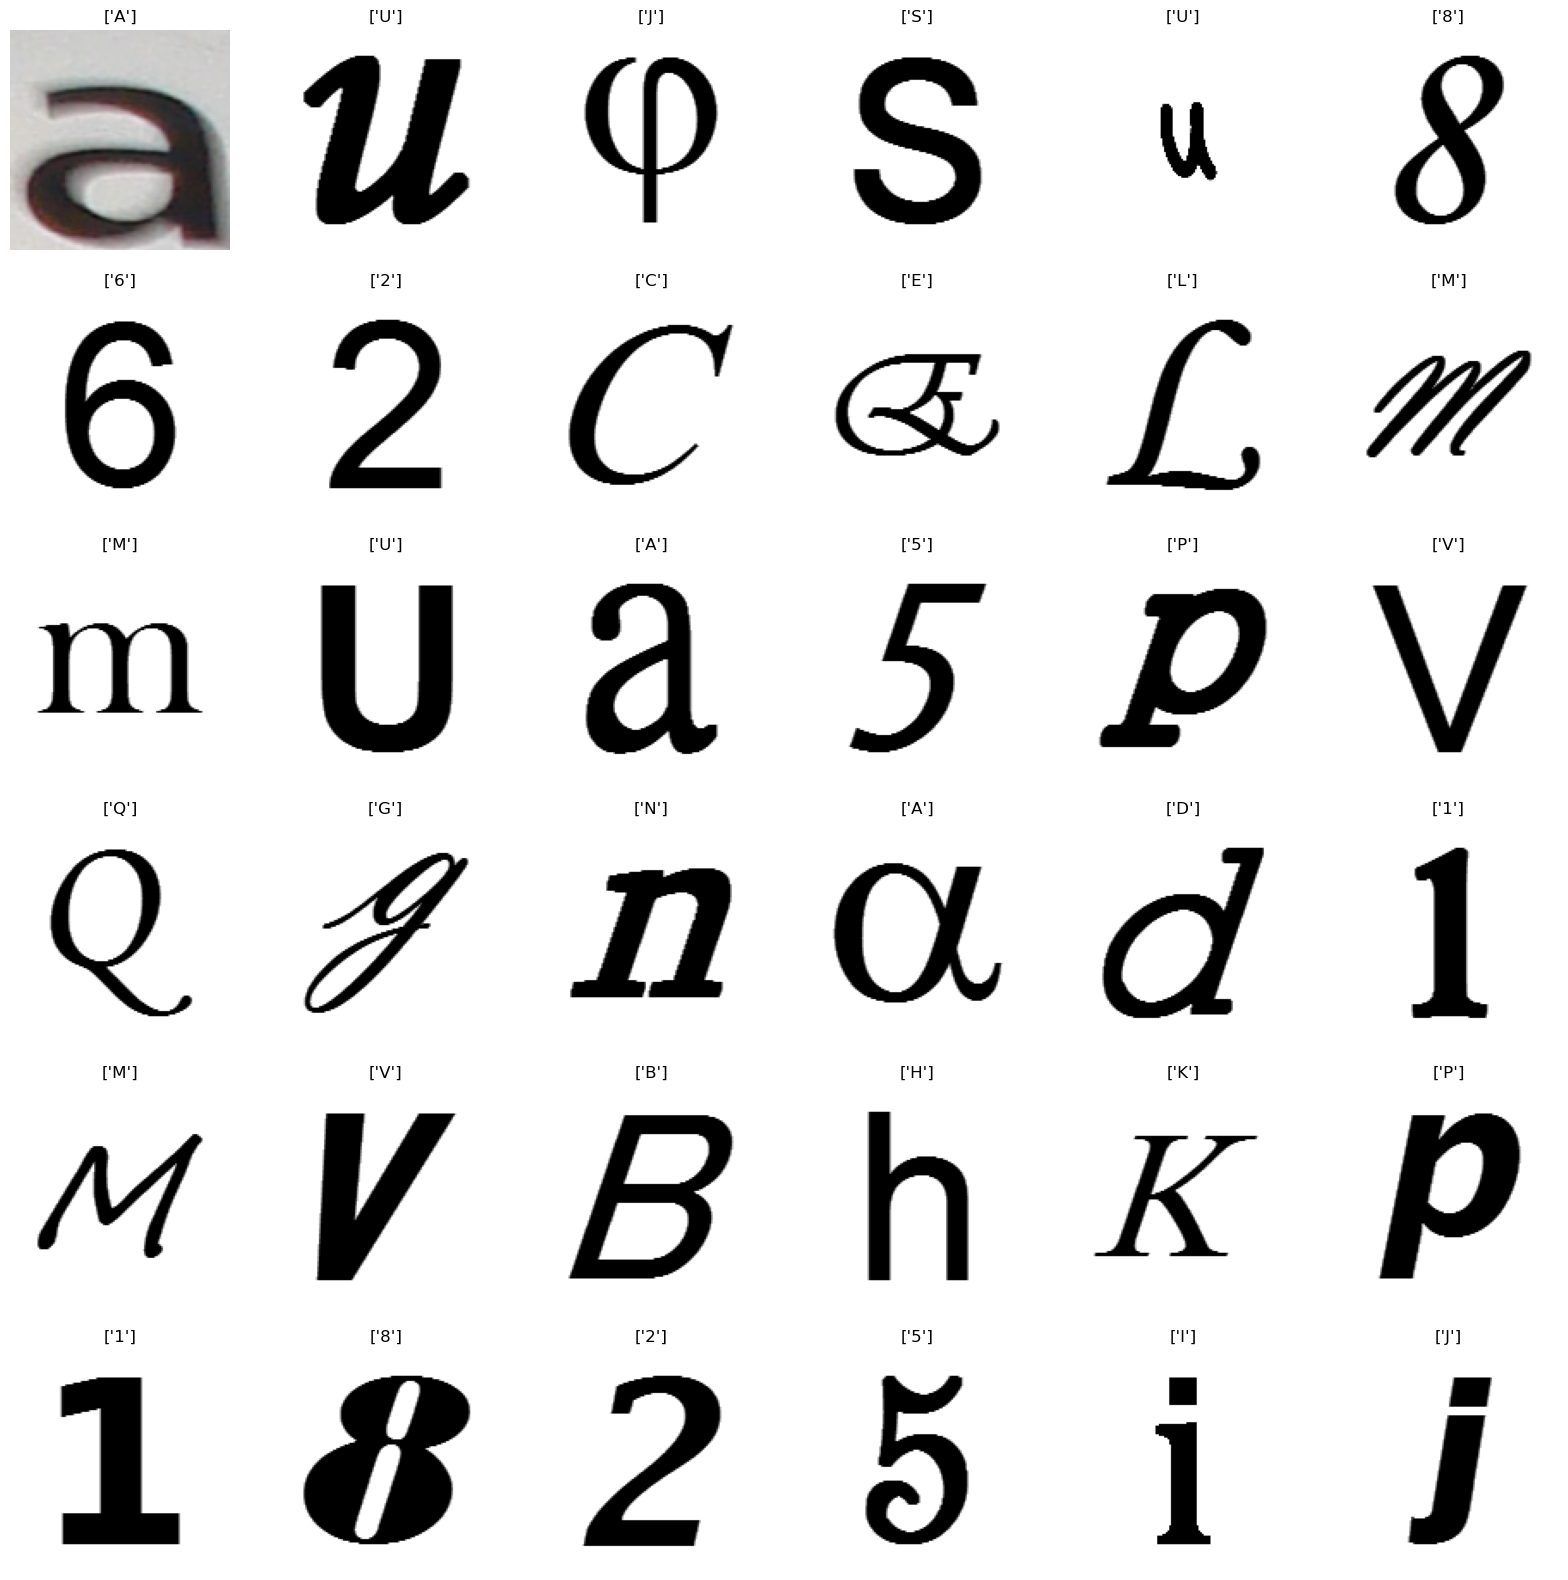

In [11]:
data=xt_img
import random
plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(data),36))):
  plt.subplot(6,6,i+1)
  plt.title(yt_img[j])
  plt.axis('off')  
  plt.imshow(data[j])

In [12]:
xt_img=np.array(xt_img)
yt_img=np.array(yt_img)

In [13]:
print(xt_img.shape)
print(yt_img.shape)

(7685, 128, 128, 3)
(7685, 1)


In [14]:
size=128
b='E:\\mydataset\\IMAG\\val\\'
from IPython.lib.display import join
xte_img=[]
yte_img=[]
for ds in d:
  k=ds.split("\\")[-1]
  print(k)


  for img in glob.glob(os.path.join(b+ds,"*.png")):
    print(img)
    imn=cv2.imread(img,cv2.IMREAD_COLOR)
    imn=cv2.resize(imn,(size,size))
    xte_img.append(imn)
    yte_img.append(k)

0
E:\mydataset\IMAG\val\0\img001-00090.png
E:\mydataset\IMAG\val\0\img001-00411.png
E:\mydataset\IMAG\val\0\img001-00412.png
E:\mydataset\IMAG\val\0\img001-00417.png
E:\mydataset\IMAG\val\0\img001-00421.png
E:\mydataset\IMAG\val\0\img001-00423.png
E:\mydataset\IMAG\val\0\img001-00668.png
E:\mydataset\IMAG\val\0\img001-00702.png
E:\mydataset\IMAG\val\0\img001-00735.png
E:\mydataset\IMAG\val\0\img001-00736.png
E:\mydataset\IMAG\val\0\img001-00738.png
E:\mydataset\IMAG\val\0\img001-00740.png
E:\mydataset\IMAG\val\0\img001-00741.png
E:\mydataset\IMAG\val\0\img001-00747.png
E:\mydataset\IMAG\val\0\img001-00748.png
E:\mydataset\IMAG\val\0\img001-00754.png
E:\mydataset\IMAG\val\0\img001-00760.png
E:\mydataset\IMAG\val\0\img001-00772.png
E:\mydataset\IMAG\val\0\img001-00773.png
E:\mydataset\IMAG\val\0\img001-00774.png
E:\mydataset\IMAG\val\0\img001-00780.png
E:\mydataset\IMAG\val\0\img001-00781.png
E:\mydataset\IMAG\val\0\img001-00782.png
E:\mydataset\IMAG\val\0\img001-00784.png
E:\mydataset\I

E:\mydataset\IMAG\val\4\img005-00109.png
E:\mydataset\IMAG\val\4\img005-00124.png
E:\mydataset\IMAG\val\4\img005-00157.png
E:\mydataset\IMAG\val\4\img005-00158.png
E:\mydataset\IMAG\val\4\img005-00161.png
E:\mydataset\IMAG\val\4\img005-00212.png
E:\mydataset\IMAG\val\4\img005-00213.png
E:\mydataset\IMAG\val\4\img005-00245.png
E:\mydataset\IMAG\val\4\img005-00246.png
E:\mydataset\IMAG\val\4\img005-00247.png
E:\mydataset\IMAG\val\4\img005-00297.png
E:\mydataset\IMAG\val\4\img005-00301.png
E:\mydataset\IMAG\val\4\img005-00331.png
E:\mydataset\IMAG\val\4\img005-00351.png
E:\mydataset\IMAG\val\4\img005-00352.png
E:\mydataset\IMAG\val\4\img005-00353.png
E:\mydataset\IMAG\val\4\img005-00383.png
E:\mydataset\IMAG\val\4\img005-00387.png
E:\mydataset\IMAG\val\4\img005-00395.png
E:\mydataset\IMAG\val\4\img005-00397.png
E:\mydataset\IMAG\val\4\img005-00398.png
E:\mydataset\IMAG\val\4\img005-00421.png
E:\mydataset\IMAG\val\4\img005-00437.png
E:\mydataset\IMAG\val\4\img005-00446.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\7\img008-00556.png
E:\mydataset\IMAG\val\7\img008-00557.png
E:\mydataset\IMAG\val\7\img008-00558.png
E:\mydataset\IMAG\val\7\img008-00570.png
E:\mydataset\IMAG\val\7\img008-00611.png
E:\mydataset\IMAG\val\7\img008-00612.png
E:\mydataset\IMAG\val\7\img008-00621.png
E:\mydataset\IMAG\val\7\img008-00622.png
E:\mydataset\IMAG\val\7\img008-00643.png
E:\mydataset\IMAG\val\7\img008-00674.png
E:\mydataset\IMAG\val\7\img008-00676.png
E:\mydataset\IMAG\val\7\img008-00677.png
E:\mydataset\IMAG\val\7\img008-00678.png
E:\mydataset\IMAG\val\7\img008-007.png
E:\mydataset\IMAG\val\7\img008-00740.png
E:\mydataset\IMAG\val\7\img008-00742.png
E:\mydataset\IMAG\val\7\img008-00814.png
E:\mydataset\IMAG\val\7\img008-00848.png
E:\mydataset\IMAG\val\7\img008-00850.png
E:\mydataset\IMAG\val\7\img008-00877.png
E:\mydataset\IMAG\val\7\img008-009.png
E:\mydataset\IMAG\val\7\img008-00911.png
E:\mydataset\IMAG\val\7\img008-00912.png
E:\mydataset\IMAG\val\7\img008-00914.png
E:\mydataset\IMAG\va

E:\mydataset\IMAG\val\A\img011-00724.png
E:\mydataset\IMAG\val\A\img011-00727.png
E:\mydataset\IMAG\val\A\img011-00736.png
E:\mydataset\IMAG\val\A\img011-00739.png
E:\mydataset\IMAG\val\A\img011-00740.png
E:\mydataset\IMAG\val\A\img011-00795.png
E:\mydataset\IMAG\val\A\img011-00800.png
E:\mydataset\IMAG\val\A\img011-00833.png
E:\mydataset\IMAG\val\A\img011-00841.png
E:\mydataset\IMAG\val\A\img011-00842.png
E:\mydataset\IMAG\val\A\img011-00843.png
E:\mydataset\IMAG\val\A\img011-00891.png
E:\mydataset\IMAG\val\A\img011-00911.png
E:\mydataset\IMAG\val\A\img011-00912.png
E:\mydataset\IMAG\val\A\img011-00914.png
E:\mydataset\IMAG\val\A\img011-00931.png
E:\mydataset\IMAG\val\A\img011-00959.png
E:\mydataset\IMAG\val\A\img011-00960.png
E:\mydataset\IMAG\val\A\img011-00980.png
E:\mydataset\IMAG\val\A\img011-00982.png
E:\mydataset\IMAG\val\A\img011-00993.png
E:\mydataset\IMAG\val\A\img011-017.png
E:\mydataset\IMAG\val\A\img011-022.png
E:\mydataset\IMAG\val\A\img011-031.png
E:\mydataset\IMAG\val\

E:\mydataset\IMAG\val\C\img013-00486.png
E:\mydataset\IMAG\val\C\img013-00487.png
E:\mydataset\IMAG\val\C\img013-00505.png
E:\mydataset\IMAG\val\C\img013-00574.png
E:\mydataset\IMAG\val\C\img013-00640.png
E:\mydataset\IMAG\val\C\img013-00642.png
E:\mydataset\IMAG\val\C\img013-00673.png
E:\mydataset\IMAG\val\C\img013-00706.png
E:\mydataset\IMAG\val\C\img013-00761.png
E:\mydataset\IMAG\val\C\img013-00772.png
E:\mydataset\IMAG\val\C\img013-00795.png
E:\mydataset\IMAG\val\C\img013-00806.png
E:\mydataset\IMAG\val\C\img013-00828.png
E:\mydataset\IMAG\val\C\img013-00830.png
E:\mydataset\IMAG\val\C\img013-00842.png
E:\mydataset\IMAG\val\C\img013-00862.png
E:\mydataset\IMAG\val\C\img013-00864.png
E:\mydataset\IMAG\val\C\img013-00874.png
E:\mydataset\IMAG\val\C\img013-00876.png
E:\mydataset\IMAG\val\C\img013-00907.png
E:\mydataset\IMAG\val\C\img013-00931.png
E:\mydataset\IMAG\val\C\img013-00966.png
E:\mydataset\IMAG\val\C\img013-00993.png
E:\mydataset\IMAG\val\C\img013-00995.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\E\img015-00146.png
E:\mydataset\IMAG\val\E\img015-00147.png
E:\mydataset\IMAG\val\E\img015-00149.png
E:\mydataset\IMAG\val\E\img015-00178.png
E:\mydataset\IMAG\val\E\img015-00210.png
E:\mydataset\IMAG\val\E\img015-00211.png
E:\mydataset\IMAG\val\E\img015-00232.png
E:\mydataset\IMAG\val\E\img015-00234.png
E:\mydataset\IMAG\val\E\img015-00266.png
E:\mydataset\IMAG\val\E\img015-00298.png
E:\mydataset\IMAG\val\E\img015-00328.png
E:\mydataset\IMAG\val\E\img015-00349.png
E:\mydataset\IMAG\val\E\img015-00381.png
E:\mydataset\IMAG\val\E\img015-00404.png
E:\mydataset\IMAG\val\E\img015-00405.png
E:\mydataset\IMAG\val\E\img015-00414.png
E:\mydataset\IMAG\val\E\img015-00499.png
E:\mydataset\IMAG\val\E\img015-00522.png
E:\mydataset\IMAG\val\E\img015-00532.png
E:\mydataset\IMAG\val\E\img015-00553.png
E:\mydataset\IMAG\val\E\img015-00555.png
E:\mydataset\IMAG\val\E\img015-00583.png
E:\mydataset\IMAG\val\E\img015-00585.png
E:\mydataset\IMAG\val\E\img015-00617.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\G\img017-00758.png
E:\mydataset\IMAG\val\G\img017-00788.png
E:\mydataset\IMAG\val\G\img017-00810.png
E:\mydataset\IMAG\val\G\img017-00821.png
E:\mydataset\IMAG\val\G\img017-00841.png
E:\mydataset\IMAG\val\G\img017-00843.png
E:\mydataset\IMAG\val\G\img017-00845.png
E:\mydataset\IMAG\val\G\img017-00872.png
E:\mydataset\IMAG\val\G\img017-00895.png
E:\mydataset\IMAG\val\G\img017-00928.png
E:\mydataset\IMAG\val\G\img017-00982.png
E:\mydataset\IMAG\val\G\img017-00985.png
E:\mydataset\IMAG\val\G\img017-00998.png
E:\mydataset\IMAG\val\G\img017-01001.png
E:\mydataset\IMAG\val\G\img017-01002.png
E:\mydataset\IMAG\val\G\img017-032.png
E:\mydataset\IMAG\val\G\img017-043.png
E:\mydataset\IMAG\val\G\img043-00062.png
E:\mydataset\IMAG\val\G\img043-00091.png
E:\mydataset\IMAG\val\G\img043-00092.png
E:\mydataset\IMAG\val\G\img043-00093.png
E:\mydataset\IMAG\val\G\img043-00149.png
E:\mydataset\IMAG\val\G\img043-00210.png
E:\mydataset\IMAG\val\G\img043-00211.png
E:\mydataset\IMAG\va

E:\mydataset\IMAG\val\I\img019-00094.png
E:\mydataset\IMAG\val\I\img019-00113.png
E:\mydataset\IMAG\val\I\img019-00114.png
E:\mydataset\IMAG\val\I\img019-00123.png
E:\mydataset\IMAG\val\I\img019-00125.png
E:\mydataset\IMAG\val\I\img019-00144.png
E:\mydataset\IMAG\val\I\img019-00146.png
E:\mydataset\IMAG\val\I\img019-00149.png
E:\mydataset\IMAG\val\I\img019-00175.png
E:\mydataset\IMAG\val\I\img019-00177.png
E:\mydataset\IMAG\val\I\img019-00199.png
E:\mydataset\IMAG\val\I\img019-00438.png
E:\mydataset\IMAG\val\I\img019-00465.png
E:\mydataset\IMAG\val\I\img019-00488.png
E:\mydataset\IMAG\val\I\img019-00519.png
E:\mydataset\IMAG\val\I\img019-00554.png
E:\mydataset\IMAG\val\I\img019-00582.png
E:\mydataset\IMAG\val\I\img019-00605.png
E:\mydataset\IMAG\val\I\img019-00608.png
E:\mydataset\IMAG\val\I\img019-00638.png
E:\mydataset\IMAG\val\I\img019-00640.png
E:\mydataset\IMAG\val\I\img019-00669.png
E:\mydataset\IMAG\val\I\img019-00671.png
E:\mydataset\IMAG\val\I\img019-00691.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\K\img021-00063.png
E:\mydataset\IMAG\val\K\img021-00064.png
E:\mydataset\IMAG\val\K\img021-00093.png
E:\mydataset\IMAG\val\K\img021-00094.png
E:\mydataset\IMAG\val\K\img021-00178.png
E:\mydataset\IMAG\val\K\img021-00210.png
E:\mydataset\IMAG\val\K\img021-00243.png
E:\mydataset\IMAG\val\K\img021-00264.png
E:\mydataset\IMAG\val\K\img021-00266.png
E:\mydataset\IMAG\val\K\img021-00350.png
E:\mydataset\IMAG\val\K\img021-00351.png
E:\mydataset\IMAG\val\K\img021-00384.png
E:\mydataset\IMAG\val\K\img021-00405.png
E:\mydataset\IMAG\val\K\img021-00413.png
E:\mydataset\IMAG\val\K\img021-00436.png
E:\mydataset\IMAG\val\K\img021-00438.png
E:\mydataset\IMAG\val\K\img021-00556.png
E:\mydataset\IMAG\val\K\img021-00609.png
E:\mydataset\IMAG\val\K\img021-00617.png
E:\mydataset\IMAG\val\K\img021-00639.png
E:\mydataset\IMAG\val\K\img021-00642.png
E:\mydataset\IMAG\val\K\img021-00726.png
E:\mydataset\IMAG\val\K\img021-00728.png
E:\mydataset\IMAG\val\K\img021-00757.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\M\img023-00945.png
E:\mydataset\IMAG\val\M\img023-00947.png
E:\mydataset\IMAG\val\M\img023-00957.png
E:\mydataset\IMAG\val\M\img023-00958.png
E:\mydataset\IMAG\val\M\img023-00975.png
E:\mydataset\IMAG\val\M\img023-00977.png
E:\mydataset\IMAG\val\M\img023-00987.png
E:\mydataset\IMAG\val\M\img023-00989.png
E:\mydataset\IMAG\val\M\img023-00992.png
E:\mydataset\IMAG\val\M\img023-00993.png
E:\mydataset\IMAG\val\M\img023-01002.png
E:\mydataset\IMAG\val\M\img023-01009.png
E:\mydataset\IMAG\val\M\img023-01010.png
E:\mydataset\IMAG\val\M\img023-01012.png
E:\mydataset\IMAG\val\M\img023-01016.png
E:\mydataset\IMAG\val\M\img049-00002.png
E:\mydataset\IMAG\val\M\img049-00010.png
E:\mydataset\IMAG\val\M\img049-00036.png
E:\mydataset\IMAG\val\M\img049-00045.png
E:\mydataset\IMAG\val\M\img049-00066.png
E:\mydataset\IMAG\val\M\img049-00083.png
E:\mydataset\IMAG\val\M\img049-00085.png
E:\mydataset\IMAG\val\M\img049-001.png
E:\mydataset\IMAG\val\M\img049-00134.png
E:\mydataset\IMAG\

E:\mydataset\IMAG\val\O\img051-00022.png
E:\mydataset\IMAG\val\O\img051-00035.png
E:\mydataset\IMAG\val\O\img051-00065.png
E:\mydataset\IMAG\val\O\img051-00096.png
E:\mydataset\IMAG\val\O\img051-00098.png
E:\mydataset\IMAG\val\O\img051-00127.png
E:\mydataset\IMAG\val\O\img051-00128.png
E:\mydataset\IMAG\val\O\img051-00158.png
E:\mydataset\IMAG\val\O\img051-00215.png
E:\mydataset\IMAG\val\O\img051-00246.png
E:\mydataset\IMAG\val\O\img051-00269.png
E:\mydataset\IMAG\val\O\img051-00278.png
E:\mydataset\IMAG\val\O\img051-00363.png
E:\mydataset\IMAG\val\O\img051-00387.png
E:\mydataset\IMAG\val\O\img051-00396.png
E:\mydataset\IMAG\val\O\img051-00417.png
E:\mydataset\IMAG\val\O\img051-00418.png
E:\mydataset\IMAG\val\O\img051-00419.png
E:\mydataset\IMAG\val\O\img051-00449.png
E:\mydataset\IMAG\val\O\img051-00451.png
E:\mydataset\IMAG\val\O\img051-00471.png
E:\mydataset\IMAG\val\O\img051-00472.png
E:\mydataset\IMAG\val\O\img051-00473.png
E:\mydataset\IMAG\val\O\img051-00481.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\Q\img027-00146.png
E:\mydataset\IMAG\val\Q\img027-00147.png
E:\mydataset\IMAG\val\Q\img027-00149.png
E:\mydataset\IMAG\val\Q\img027-00177.png
E:\mydataset\IMAG\val\Q\img027-00178.png
E:\mydataset\IMAG\val\Q\img027-00180.png
E:\mydataset\IMAG\val\Q\img027-00209.png
E:\mydataset\IMAG\val\Q\img027-00210.png
E:\mydataset\IMAG\val\Q\img027-00211.png
E:\mydataset\IMAG\val\Q\img027-00212.png
E:\mydataset\IMAG\val\Q\img027-00235.png
E:\mydataset\IMAG\val\Q\img027-00319.png
E:\mydataset\IMAG\val\Q\img027-00328.png
E:\mydataset\IMAG\val\Q\img027-00352.png
E:\mydataset\IMAG\val\Q\img027-00384.png
E:\mydataset\IMAG\val\Q\img027-00439.png
E:\mydataset\IMAG\val\Q\img027-00468.png
E:\mydataset\IMAG\val\Q\img027-00499.png
E:\mydataset\IMAG\val\Q\img027-00521.png
E:\mydataset\IMAG\val\Q\img027-00552.png
E:\mydataset\IMAG\val\Q\img027-00554.png
E:\mydataset\IMAG\val\Q\img027-00584.png
E:\mydataset\IMAG\val\Q\img027-00586.png
E:\mydataset\IMAG\val\Q\img027-00607.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\S\img029-00555.png
E:\mydataset\IMAG\val\S\img029-00570.png
E:\mydataset\IMAG\val\S\img029-00572.png
E:\mydataset\IMAG\val\S\img029-00573.png
E:\mydataset\IMAG\val\S\img029-00583.png
E:\mydataset\IMAG\val\S\img029-00585.png
E:\mydataset\IMAG\val\S\img029-00588.png
E:\mydataset\IMAG\val\S\img029-00607.png
E:\mydataset\IMAG\val\S\img029-00608.png
E:\mydataset\IMAG\val\S\img029-00618.png
E:\mydataset\IMAG\val\S\img029-00620.png
E:\mydataset\IMAG\val\S\img029-00621.png
E:\mydataset\IMAG\val\S\img029-00655.png
E:\mydataset\IMAG\val\S\img029-00675.png
E:\mydataset\IMAG\val\S\img029-00685.png
E:\mydataset\IMAG\val\S\img029-00706.png
E:\mydataset\IMAG\val\S\img029-00710.png
E:\mydataset\IMAG\val\S\img029-00720.png
E:\mydataset\IMAG\val\S\img029-00743.png
E:\mydataset\IMAG\val\S\img029-00778.png
E:\mydataset\IMAG\val\S\img029-00805.png
E:\mydataset\IMAG\val\S\img029-00806.png
E:\mydataset\IMAG\val\S\img029-00807.png
E:\mydataset\IMAG\val\S\img029-00810.png
E:\mydataset\IMA

E:\mydataset\IMAG\val\U\img057-00618.png
E:\mydataset\IMAG\val\U\img057-00620.png
E:\mydataset\IMAG\val\U\img057-00621.png
E:\mydataset\IMAG\val\U\img057-00622.png
E:\mydataset\IMAG\val\U\img057-00673.png
E:\mydataset\IMAG\val\U\img057-00708.png
E:\mydataset\IMAG\val\U\img057-00728.png
E:\mydataset\IMAG\val\U\img057-00759.png
E:\mydataset\IMAG\val\U\img057-00760.png
E:\mydataset\IMAG\val\U\img057-00761.png
E:\mydataset\IMAG\val\U\img057-00822.png
E:\mydataset\IMAG\val\U\img057-00823.png
E:\mydataset\IMAG\val\U\img057-00846.png
E:\mydataset\IMAG\val\U\img057-00847.png
E:\mydataset\IMAG\val\U\img057-00907.png
E:\mydataset\IMAG\val\U\img057-00940.png
E:\mydataset\IMAG\val\U\img057-00962.png
E:\mydataset\IMAG\val\U\img057-022.png
E:\mydataset\IMAG\val\U\img057-032.png
V
E:\mydataset\IMAG\val\V\img032-00062.png
E:\mydataset\IMAG\val\V\img032-00064.png
E:\mydataset\IMAG\val\V\img032-00095.png
E:\mydataset\IMAG\val\V\img032-00125.png
E:\mydataset\IMAG\val\V\img032-00147.png
E:\mydataset\IMAG\

E:\mydataset\IMAG\val\Y\img035-00092.png
E:\mydataset\IMAG\val\Y\img035-00093.png
E:\mydataset\IMAG\val\Y\img035-00095.png
E:\mydataset\IMAG\val\Y\img035-00115.png
E:\mydataset\IMAG\val\Y\img035-00201.png
E:\mydataset\IMAG\val\Y\img035-00232.png
E:\mydataset\IMAG\val\Y\img035-00295.png
E:\mydataset\IMAG\val\Y\img035-00296.png
E:\mydataset\IMAG\val\Y\img035-00298.png
E:\mydataset\IMAG\val\Y\img035-00384.png
E:\mydataset\IMAG\val\Y\img035-00404.png
E:\mydataset\IMAG\val\Y\img035-00467.png
E:\mydataset\IMAG\val\Y\img035-00468.png
E:\mydataset\IMAG\val\Y\img035-00469.png
E:\mydataset\IMAG\val\Y\img035-00498.png
E:\mydataset\IMAG\val\Y\img035-00500.png
E:\mydataset\IMAG\val\Y\img035-00555.png
E:\mydataset\IMAG\val\Y\img035-00583.png
E:\mydataset\IMAG\val\Y\img035-00670.png
E:\mydataset\IMAG\val\Y\img035-00702.png
E:\mydataset\IMAG\val\Y\img035-00724.png
E:\mydataset\IMAG\val\Y\img035-00758.png
E:\mydataset\IMAG\val\Y\img035-00813.png
E:\mydataset\IMAG\val\Y\img035-00872.png
E:\mydataset\IMA

In [15]:
xte_img=np.array(xte_img)
yte_img=np.array(yte_img)

In [16]:
xte_img.shape

(3322, 128, 128, 3)

In [17]:
yte_img.shape

(3322,)

# Encoding my labels 

In [18]:
le=preprocessing.LabelEncoder()
le.fit(yt_img)
y=le.transform(yt_img)
le.fit(yte_img)
ye=le.transform(yte_img)

E:\Lenovo\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\Lenovo\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [19]:
ye

array([ 0,  0,  0, ..., 35, 35, 35])

In [20]:
y

array([ 0,  0,  0, ..., 35, 35, 35])

In [21]:
x_train,y_train,x_test,y_test=xt_img,y,xte_img,ye

# Scaling px 0-1

In [22]:
x_train,x_test=x_train/255.0,x_test/255.0

In [23]:
print(y_train.shape)
print(y_train.dtype)
print(x_train.shape)
print(x_train.dtype)
print(y_test.shape)
print(y_test.dtype)
print(x_test.shape)
print(x_test.dtype)

(7685,)
int32
(7685, 128, 128, 3)
float64
(3322,)
int32
(3322, 128, 128, 3)
float64


# Reshape and Expand my train-test images

In [24]:
image_features=x_train

In [25]:
n_featur=image_features.shape[1]
n_featur

128

In [26]:
image_features=np.expand_dims(image_features,axis=0)
image_features.shape

(1, 7685, 128, 128, 3)

In [27]:
print(image_features.shape)
X=np.reshape(image_features,(x_train.shape[0],-1))
print(X.shape)

(1, 7685, 128, 128, 3)
(7685, 49152)


In [28]:
test_features=x_test

In [29]:
test_features=np.expand_dims(test_features,axis=0)
print(test_features.shape)
Xp=np.reshape(test_features,(x_test.shape[0],-1))
print(Xp.shape)

(1, 3322, 128, 128, 3)
(3322, 49152)


# Using SVM-SVC Model  

In [30]:
model=svm.SVC( decision_function_shape='ovo')

model.fit(X,y_train)

SVC(decision_function_shape='ovo')

In [31]:
print('model Test Score is : ' , model.score(Xp, y_test))

model Test Score is :  0.7859723058398556


In [32]:
test_pred=model.predict(Xp)

In [33]:
test_pred=le.inverse_transform(test_pred)

# Accurcy

In [34]:
print("Accuracy =",'{:.0f}%'.format(metrics.accuracy_score(yte_img,test_pred)*100))


Accuracy = 79%


In [35]:
test_pred[500:1250]

array(['8', '8', '8', '8', '8', 'G', 'J', '8', '8', '8', '8', '8', 'G',
       '8', 'S', 'B', '8', '8', 'I', '8', '8', '8', 'B', '8', '8', '8',
       '8', '8', '8', '8', 'I', '8', '8', '8', 'I', 'F', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       'Q', '9', '9', '9', '9', '9', 'W', '9', '9', 'N', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', 'J', '9', '9', '9', '9', '9',
       '9', '9', '5', '9', 'J', 'G', '9', '9', '9', '0', 'J', '9', 'D',
       'J', 'J', 'J', '9', '9', '9', '9', '9', '9', 'X', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'J',
       'F', 'F', 'R', 'R', 'R', 'R', 'I', 'R', 'E', 'R', 'E', 'E', 'G',
       'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

In [36]:
yte_img[500:1250]

array(['8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

In [48]:
result = pd.DataFrame({'original' : yte_img,'predicted' : test_pred})
result.head(n=36)

,original,predicted
0,0,R
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yte_img,test_pred)

<AxesSubplot:>

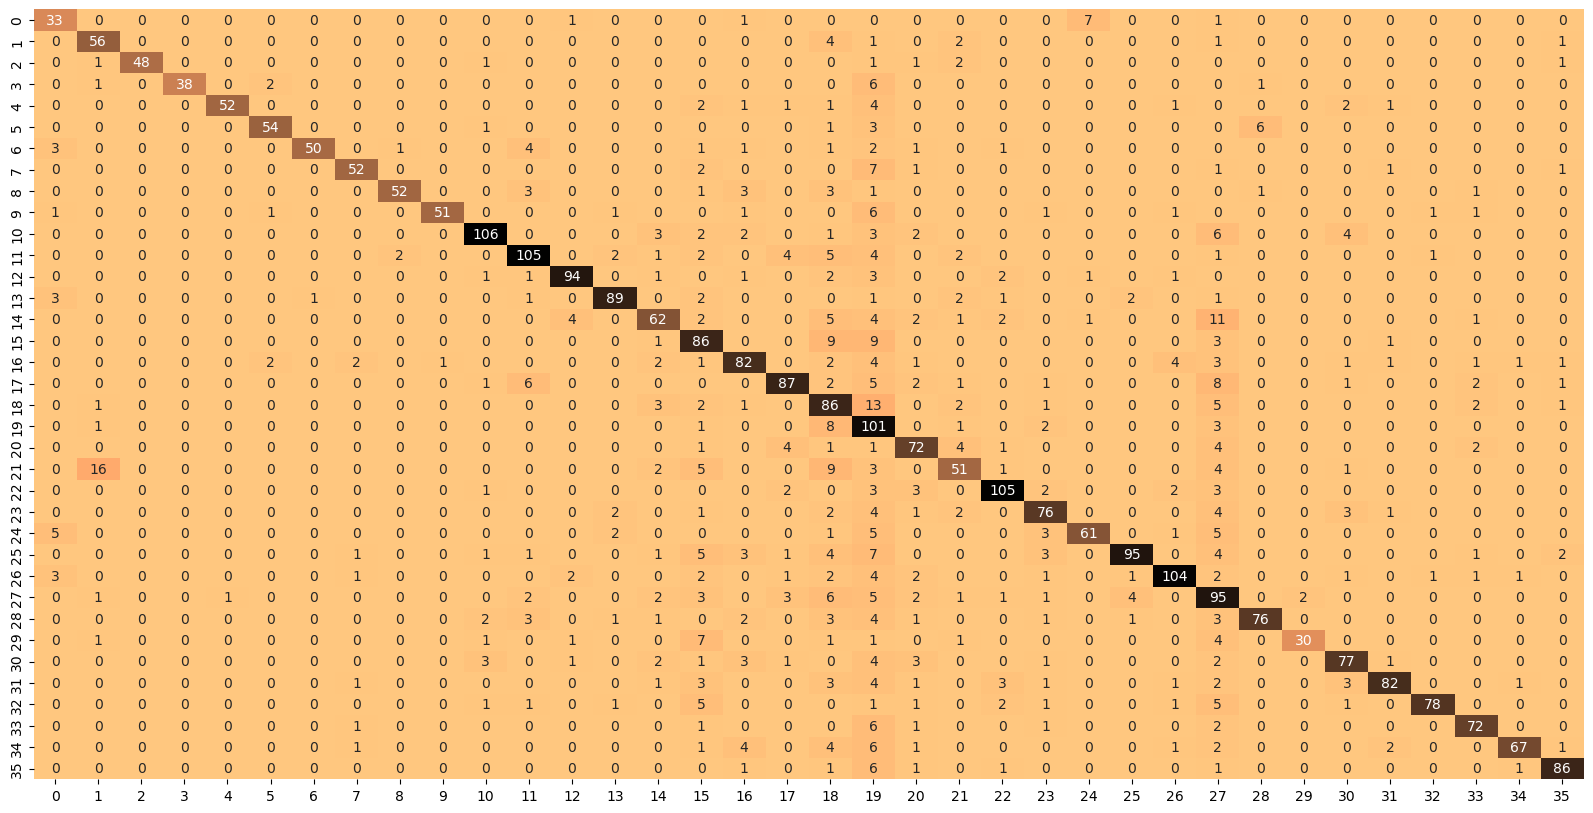

In [41]:

fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(cm,annot=True,cmap="copper_r",fmt="d",cbar=False,ax=ax)


# Prediction randomly

E:\Lenovo\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



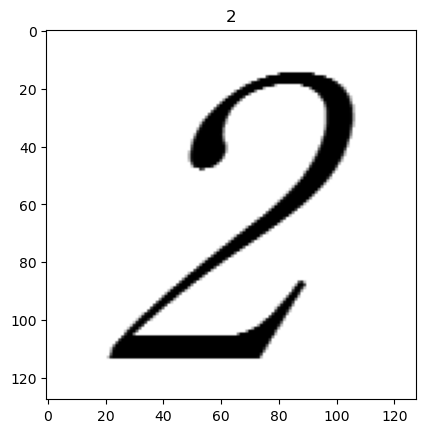

In [75]:

  n=random.randint(0,x_test.shape[0]-1)
  im=x_test[n]
  plt.imshow(im)
  plt.title(yte_img[n])
  n_im=np.expand_dims(im,axis=0)
  n_im_fe=np.expand_dims(n_im,axis=0)
  n_im_fe_re=np.reshape(n_im_fe,(n_im.shape[0],-1))
  im_predi=model.predict(n_im_fe_re)
  im_predi=le.inverse_transform([im_predi])

actual = 2
prediction ['2']


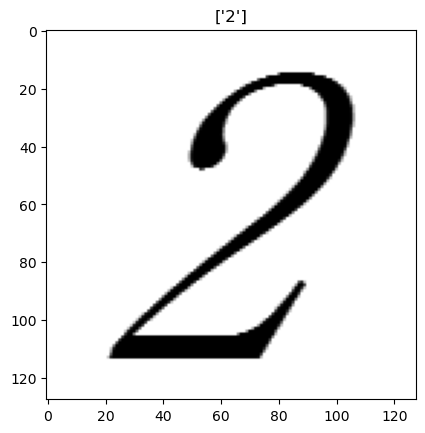

In [76]:
plt.imshow(im)
plt.title(im_predi)
print("actual =",yte_img[n])
print("prediction",im_predi)

In [56]:
#print('model Test Score is : ' , m.score(Xp, y_test)) 
#7asbi alah w n3ma elwkellll....

model Test Score is :  0.22245635159542446


In [53]:
from sklearn.metrics import classification_report
le.fit(test_pred)
u=le.transform(test_pred)
print(classification_report(y_test,u))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        43
           1       0.72      0.86      0.78        65
           2       1.00      0.87      0.93        55
           3       1.00      0.79      0.88        48
           4       0.98      0.80      0.88        65
           5       0.92      0.83      0.87        65
           6       0.98      0.77      0.86        65
           7       0.88      0.80      0.84        65
           8       0.95      0.80      0.87        65
           9       0.98      0.78      0.87        65
          10       0.89      0.82      0.85       129
          11       0.83      0.81      0.82       129
          12       0.91      0.88      0.90       107
          13       0.91      0.86      0.89       103
          14       0.76      0.65      0.70        95
          15       0.62      0.79      0.69       109
          16       0.77      0.75      0.76       109
          17       0.84    